# IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  # This is critical for t-tests and chi-square

# Load the dataset

In [45]:
data = pd.read_csv('audit_data.csv')

In [46]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Year Firm_Name  Total_Audit_Engagements  High_Risk_Cases  \
0  2020       PwC                     2829               51   
1  2022  Deloitte                     3589              185   
2  2020       PwC                     2438              212   
3  2021       PwC                     2646              397   
4  2020       PwC                     2680              216   

   Compliance_Violations  Fraud_Cases_Detected Industry_Affected  \
0                    123                    39        Healthcare   
1                     30                    60        Healthcare   
2                    124                    97        Healthcare   
3                     55                    97        Healthcare   
4                     99                    46        Healthcare   

   Total_Revenue_Impact AI_Used_for_Auditing  Employee_Workload  \
0                114.24                   No                 57   
1                156.98                  Yes     

# Basic Data Exploration

In [47]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (100, 12)


In [48]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB
None


In [49]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Year  Total_Audit_Engagements  High_Risk_Cases  \
count   100.000000               100.000000       100.000000   
mean   2022.320000              2784.520000       277.730000   
std       1.780251              1281.863073       135.735174   
min    2020.000000               603.000000        51.000000   
25%    2021.000000              1768.250000       162.500000   
50%    2022.000000              2650.000000       293.000000   
75%    2024.000000              4008.750000       395.500000   
max    2025.000000              4946.000000       500.000000   

       Compliance_Violations  Fraud_Cases_Detected  Total_Revenue_Impact  \
count             100.000000            100.000000            100.000000   
mean              105.480000             52.700000            272.539000   
std                55.370101             28.311221            139.151401   
min                10.000000              5.000000             33.460000   
25%                54.

In [50]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64


# Clean the Data

In [70]:
data['AI_Used_for_Auditing'] = data['AI_Used_for_Auditing'].map({'Yes': 1, 'No': 0})

In [52]:
print("\nFirst 5 rows after conversion:")
print(data.head())


First 5 rows after conversion:
   Year Firm_Name  Total_Audit_Engagements  High_Risk_Cases  \
0  2020       PwC                     2829               51   
1  2022  Deloitte                     3589              185   
2  2020       PwC                     2438              212   
3  2021       PwC                     2646              397   
4  2020       PwC                     2680              216   

   Compliance_Violations  Fraud_Cases_Detected Industry_Affected  \
0                    123                    39        Healthcare   
1                     30                    60        Healthcare   
2                    124                    97        Healthcare   
3                     55                    97        Healthcare   
4                     99                    46        Healthcare   

   Total_Revenue_Impact  AI_Used_for_Auditing  Employee_Workload  \
0                114.24                     0                 57   
1                156.98                     

In [53]:
data['Fraud_Detection_Rate'] = data['Fraud_Cases_Detected'] / data['Total_Audit_Engagements']  # Fraud detection efficiency
data['Fraud_Detection_Rate']

0     0.013786
1     0.016718
2     0.039787
3     0.036659
4     0.017164
        ...   
95    0.016511
96    0.027843
97    0.025197
98    0.007384
99    0.012967
Name: Fraud_Detection_Rate, Length: 100, dtype: float64

In [54]:
data['Revenue_Per_Engagement'] = data['Total_Revenue_Impact'] / data['Total_Audit_Engagements']  # Revenue impact per audit
data['Revenue_Per_Engagement']

0     0.040382
1     0.043739
2     0.054073
3     0.086587
4     0.017910
        ...   
95    0.021486
96    0.085918
97    0.091612
98    0.240549
99    0.052564
Name: Revenue_Per_Engagement, Length: 100, dtype: float64

# Implement Statistical Tests

In [55]:
# --- Statistical Test 1: AI vs Fraud Detection Rate ---
# Split data into AI and non-AI groups
ai_group = data[data['AI_Used_for_Auditing'] == 1]['Fraud_Detection_Rate']
no_ai_group = data[data['AI_Used_for_Auditing'] == 0]['Fraud_Detection_Rate']

In [56]:
# Perform t-test
t_stat_ai, p_value_ai = stats.ttest_ind(ai_group, no_ai_group, nan_policy='omit')
print("\nTest 1: AI vs Fraud Detection Rate")
print(f"T-statistic: {t_stat_ai:.4f}, P-value: {p_value_ai:.4f}")
if p_value_ai < 0.05:
    print("Result: Significant difference (AI impacts Fraud Detection Rate)")
else:
    print("Result: No significant difference")


Test 1: AI vs Fraud Detection Rate
T-statistic: -0.3114, P-value: 0.7561
Result: No significant difference


In [57]:
# Statistical Test 2: Workload vs Audit Effectiveness
median_workload = data['Employee_Workload'].median()
high_workload = data[data['Employee_Workload'] > median_workload]['Audit_Effectiveness_Score']
low_workload = data[data['Employee_Workload'] <= median_workload]['Audit_Effectiveness_Score']
t_stat_workload, p_value_workload = stats.ttest_ind(high_workload, low_workload, nan_policy='omit')
print("\nTest 2: Workload vs Audit Effectiveness")
print(f"T-statistic: {t_stat_workload:.4f}, P-value: {p_value_workload:.4f}")
if p_value_workload < 0.05:
    print("Result: Significant difference (Workload impacts Effectiveness)")
else:
    print("Result: No significant difference")


Test 2: Workload vs Audit Effectiveness
T-statistic: -0.0843, P-value: 0.9330
Result: No significant difference


In [58]:
# Statistical Test 3: Fraud Cases vs Industry
data['Fraud_Binned'] = pd.qcut(data['Fraud_Cases_Detected'], q=3, labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(data['Industry_Affected'], data['Fraud_Binned'])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print("\nTest 3: Fraud Cases vs Industry")
print(f"Chi2 Statistic: {chi2_stat:.4f}, P-value: {p_value_chi2:.4f}, Degrees of Freedom: {dof}")
if p_value_chi2 < 0.05:
    print("Result: Significant relationship (Fraud Cases depend on Industry)")
else:
    print("Result: No significant relationship")


Test 3: Fraud Cases vs Industry
Chi2 Statistic: 2.5988, P-value: 0.8572, Degrees of Freedom: 6
Result: No significant relationship


# Fraud_Detection_Rate to compare firms.

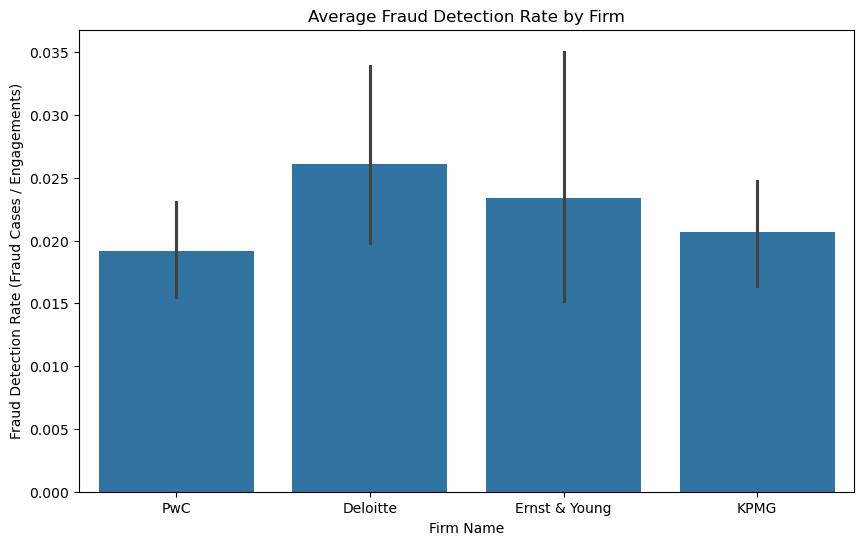

In [59]:
# Bar plot for Fraud Detection Rate by Firm
plt.figure(figsize=(10, 6))
sns.barplot(x='Firm_Name', y='Fraud_Detection_Rate', data=data, estimator=np.mean)
plt.title('Average Fraud Detection Rate by Firm')
plt.xlabel('Firm Name')
plt.ylabel('Fraud Detection Rate (Fraud Cases / Engagements)')
plt.show()

# Does AI Improve Fraud Detection?

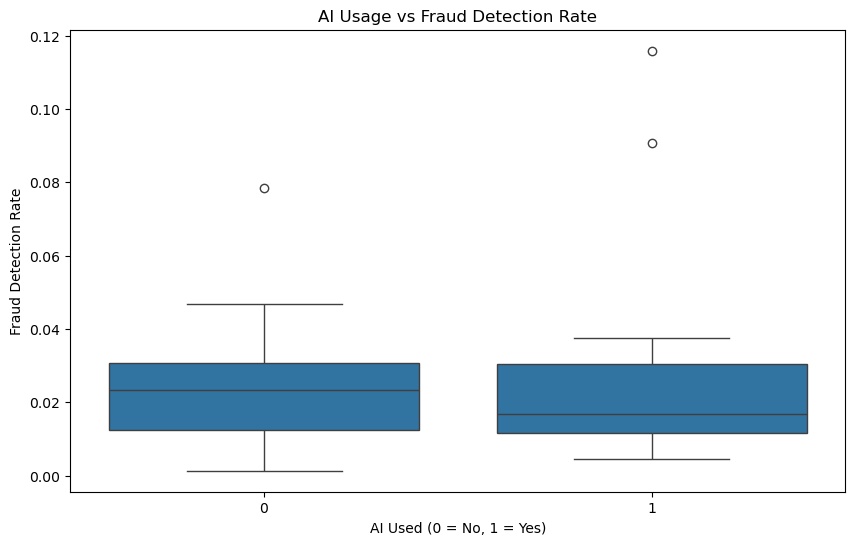

In [60]:
# Box plot for AI Usage vs Fraud Detection Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI_Used_for_Auditing', y='Fraud_Detection_Rate', data=data)
plt.title('AI Usage vs Fraud Detection Rate')
plt.xlabel('AI Used (0 = No, 1 = Yes)')
plt.ylabel('Fraud Detection Rate')
plt.show()

# How Does Workload Affect Effectiveness?

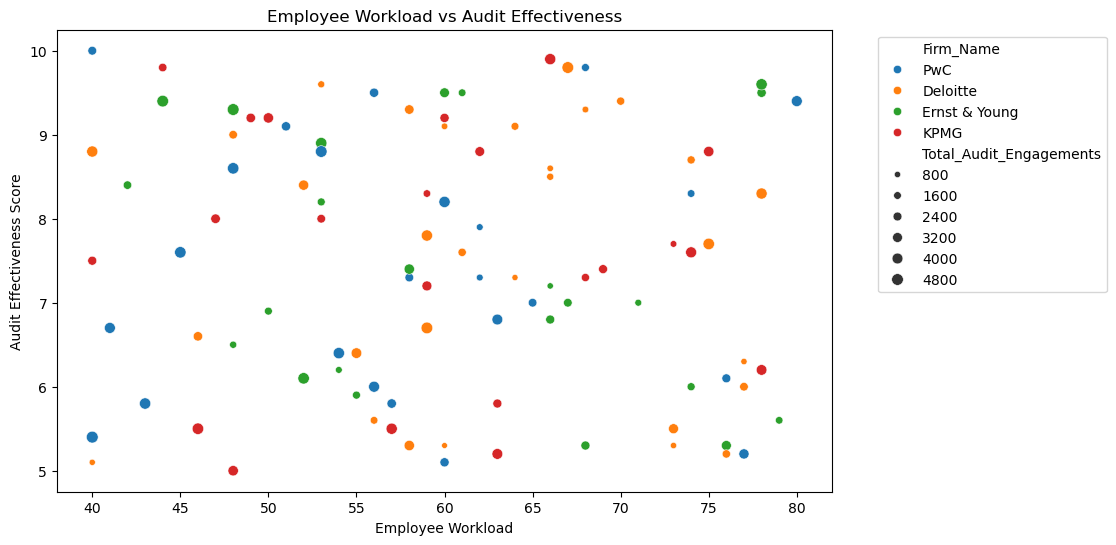

In [61]:
# Scatter plot for Workload vs Effectiveness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_Workload', y='Audit_Effectiveness_Score', hue='Firm_Name', size='Total_Audit_Engagements', data=data)
plt.title('Employee Workload vs Audit Effectiveness')
plt.xlabel('Employee Workload')
plt.ylabel('Audit Effectiveness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Total Audit Engagements by Firm

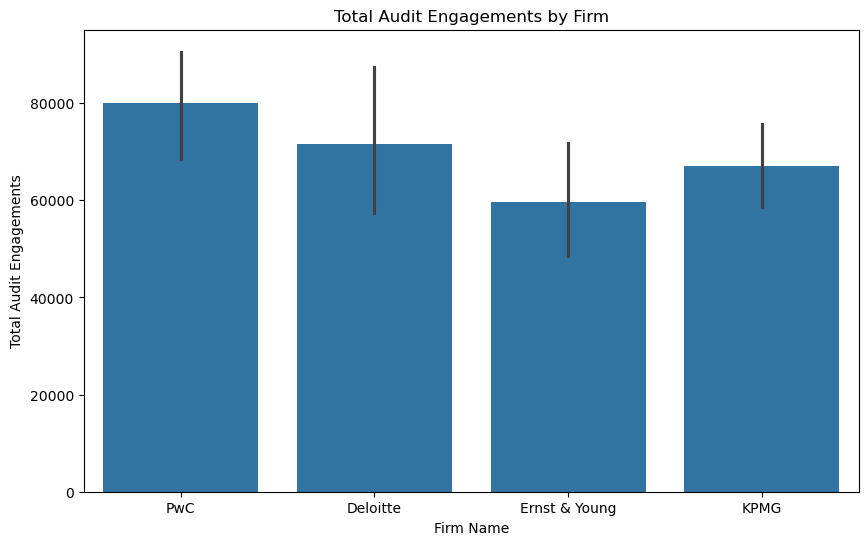

In [62]:
# Bar plot for Total Audit Engagements by Firm
plt.figure(figsize=(10, 6))
sns.barplot(x='Firm_Name', y='Total_Audit_Engagements', data=data, estimator=sum)
plt.title('Total Audit Engagements by Firm')
plt.xlabel('Firm Name')
plt.ylabel('Total Audit Engagements')
plt.show()

# Industry Trends Over Time

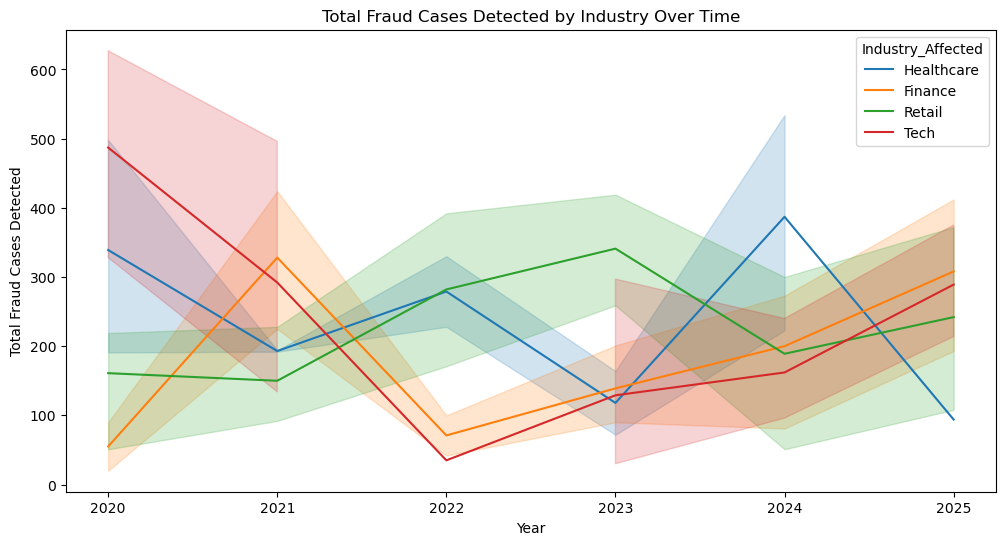

In [63]:
# Line plot for Fraud Cases by Industry Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Fraud_Cases_Detected', hue='Industry_Affected', data=data, estimator=sum)
plt.title('Total Fraud Cases Detected by Industry Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fraud Cases Detected')
plt.show()

# Fraud Cases Detected by Year

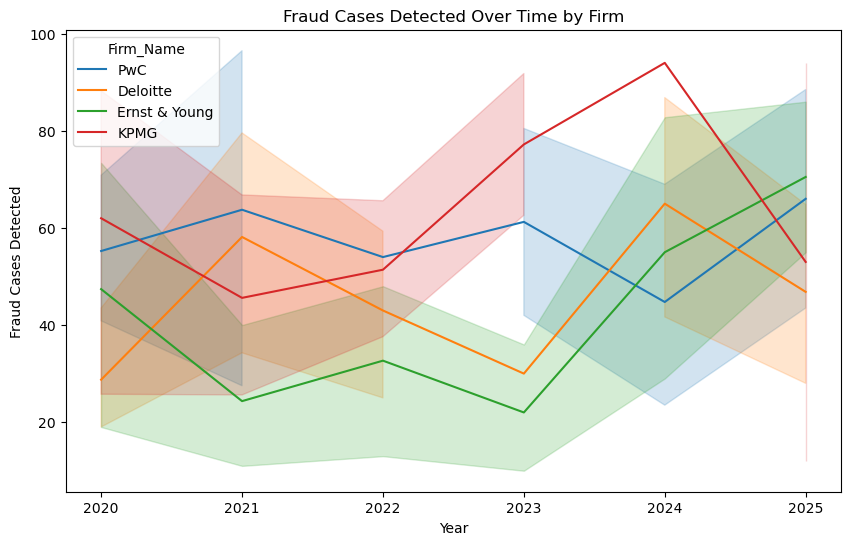

In [64]:
# Line plot for Fraud Cases Detected by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Fraud_Cases_Detected', hue='Firm_Name', data=data)
plt.title('Fraud Cases Detected Over Time by Firm')
plt.xlabel('Year')
plt.ylabel('Fraud Cases Detected')
plt.show()

# Revenue Impact vs Client Satisfaction

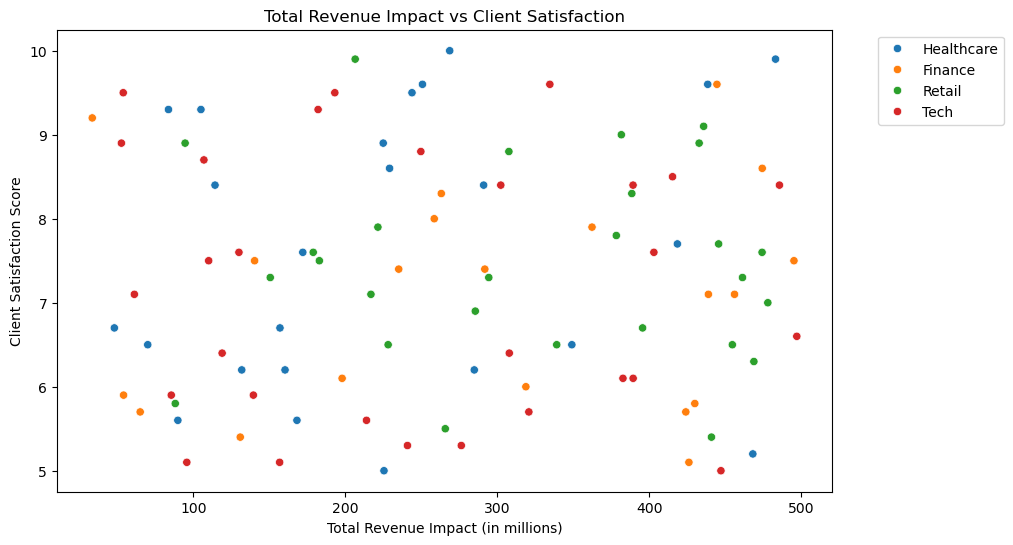

In [65]:
# Scatter plot for Revenue Impact vs Client Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Revenue_Impact', y='Client_Satisfaction_Score', hue='Industry_Affected', data=data)
plt.title('Total Revenue Impact vs Client Satisfaction')
plt.xlabel('Total Revenue Impact (in millions)')
plt.ylabel('Client Satisfaction Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# AI Usage vs Audit Effectiveness
Does using AI improve effectiveness?
Insight:
Compare effectiveness scores with and without AI.

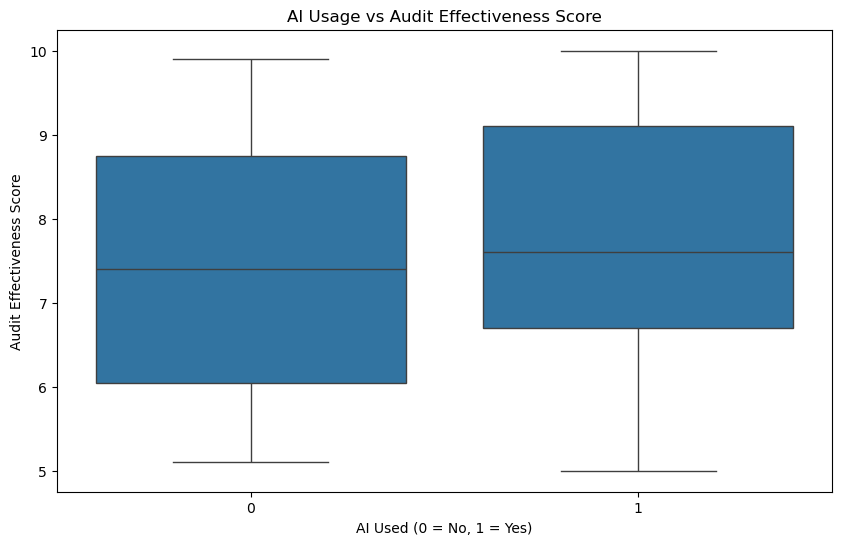

In [66]:
# Box plot for AI Usage vs Audit Effectiveness
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI_Used_for_Auditing', y='Audit_Effectiveness_Score', data=data)
plt.title('AI Usage vs Audit Effectiveness Score')
plt.xlabel('AI Used (0 = No, 1 = Yes)')
plt.ylabel('Audit Effectiveness Score')
plt.show()

# Revenue Impact by Industry
Which industries have the highest financial impact?

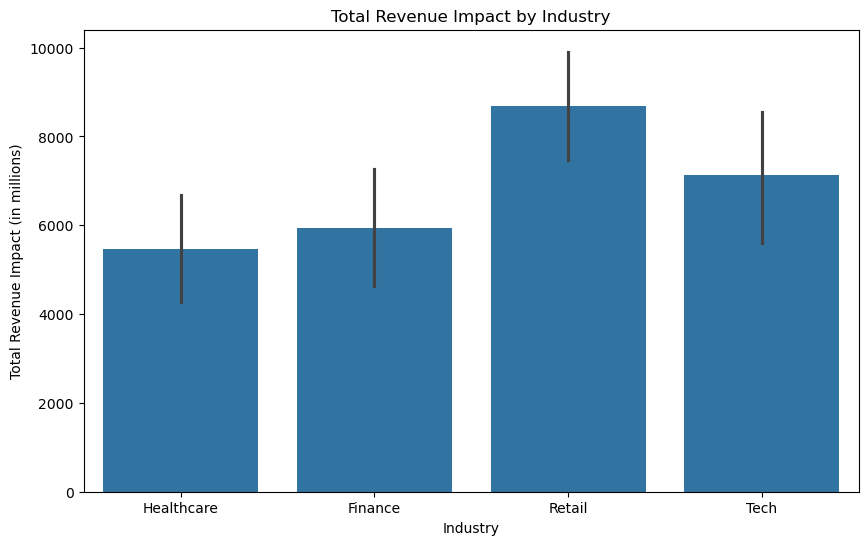

In [67]:
# Bar plot for Revenue Impact by Industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry_Affected', y='Total_Revenue_Impact', data=data, estimator=sum)
plt.title('Total Revenue Impact by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Revenue Impact (in millions)')
plt.show()

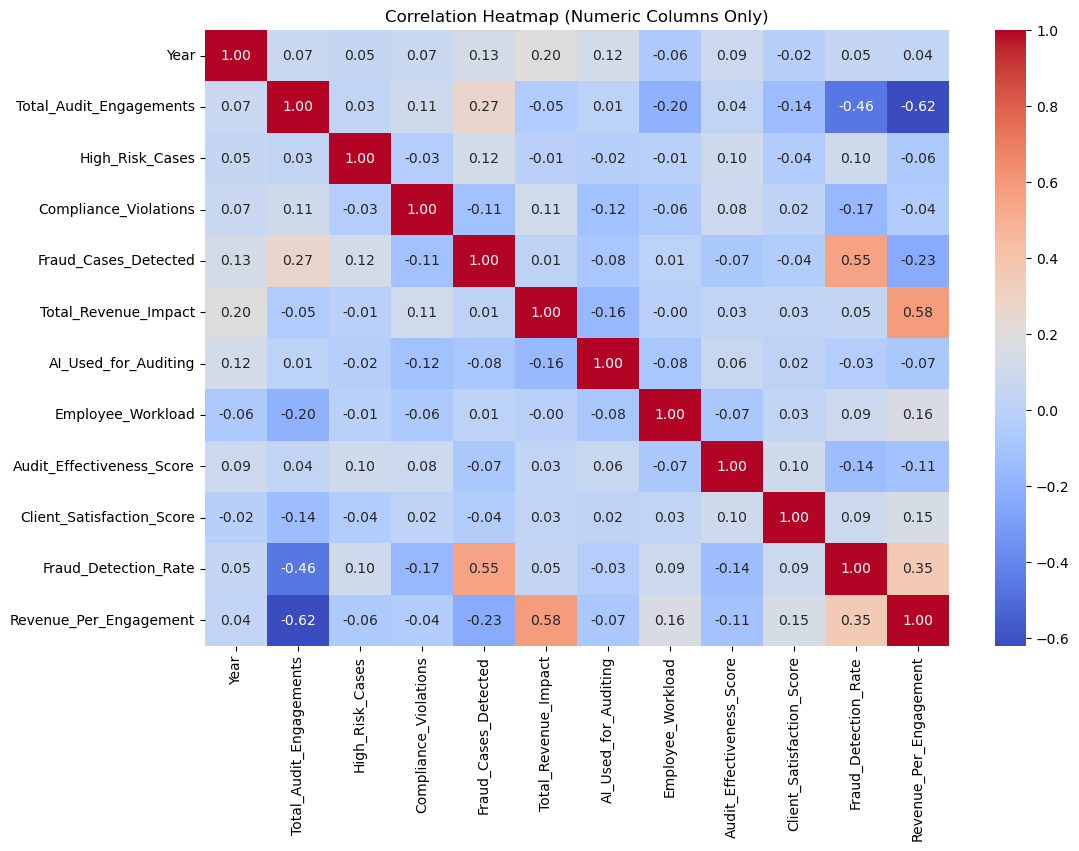

In [68]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix with numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# Enhanced Correlation Heatmap

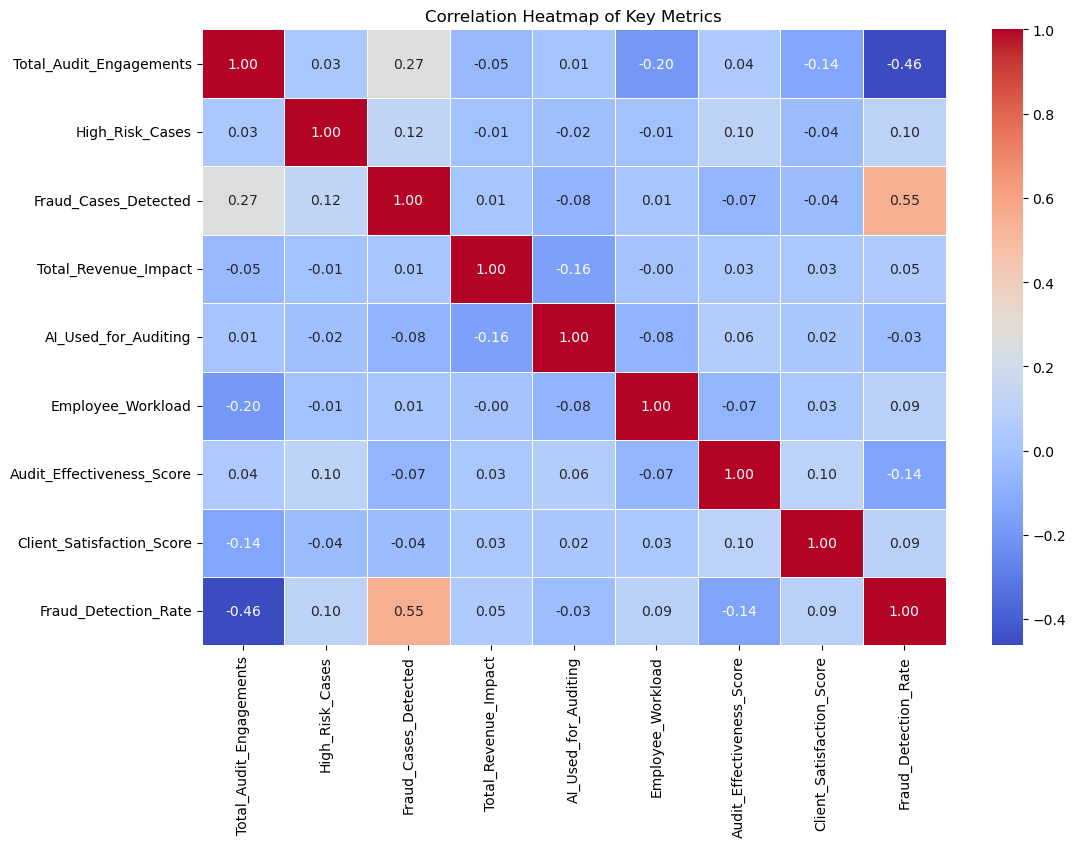

In [69]:
# Select key numeric columns for correlation
key_columns = ['Total_Audit_Engagements', 'High_Risk_Cases', 'Fraud_Cases_Detected', 
               'Total_Revenue_Impact', 'AI_Used_for_Auditing', 'Employee_Workload', 
               'Audit_Effectiveness_Score', 'Client_Satisfaction_Score', 'Fraud_Detection_Rate']
numeric_data = data[key_columns]

# Enhanced Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()